In [1]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
path = '../../dgym-data'

deck = dg.MoleculeCollection.load(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

building_blocks = dg.datasets.disk_loader(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/out/Enamine_Building_Blocks_Stock_262336cmpd_20230630_atoms.fpb')

Working on new docking oracles.

In [52]:
from dgym.envs.designer import Designer, Generator

designer = Designer(
    Generator(building_blocks, fingerprints),
    reactions,
    cache = True
)

In [62]:
%%time
analogs = []
designer.cache = False
analogs += designer.design(deck[0], 2, temperature=0.0, replace=0)
analogs += designer.design(deck[0], 3, temperature=0.0, replace=1)
analogs += designer.design(deck[0], 3, temperature=0.0, replace=0, strict=True)
analogs += designer.design(deck[0], 2, temperature=0.0, replace=1, strict=True)

CPU times: user 49.5 ms, sys: 134 µs, total: 49.6 ms
Wall time: 53.4 ms


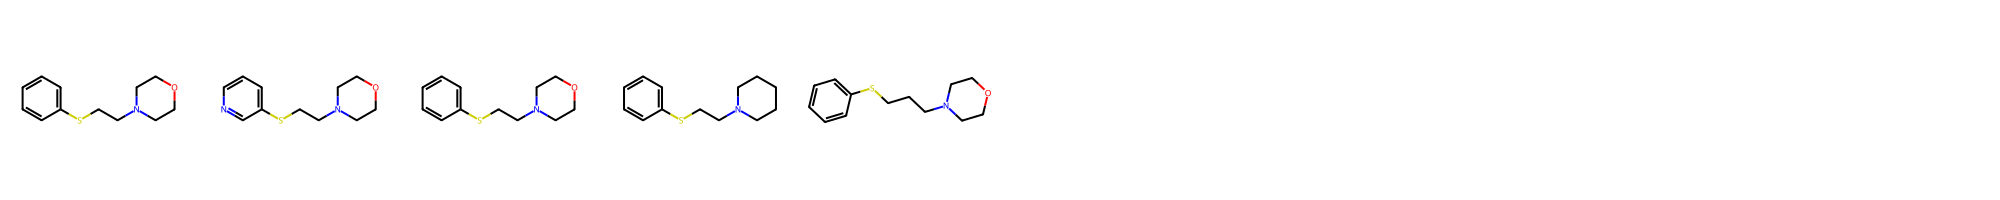

In [56]:
from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage([a.mol for a in analogs], molsPerRow=10)